### Import the Necessary Libraries :

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

### Data Info :

In [4]:
data = pd.read_csv('data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


In [5]:
data.shape

(167, 10)

In [6]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [9]:
data.describe().T[['mean']] # Dataframe vs data.describe().T['mean'] is a series

,mean
child_mort,38.27
exports,41.11
health,6.82
imports,46.89
income,17144.69
inflation,7.78
life_expec,70.56
total_fer,2.95
gdpp,12964.16


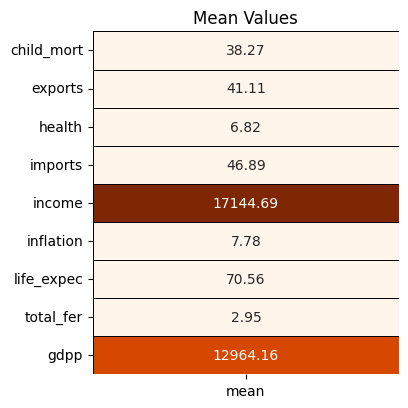

In [10]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values')

fig.tight_layout(pad = 4)

### Exploratory Data Analysis

In [11]:
col = list(data.columns)
col.remove('country') # remove the country value
categorical_features = ['country']
numerical_features = [*col] 
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


### Distribution of Features :

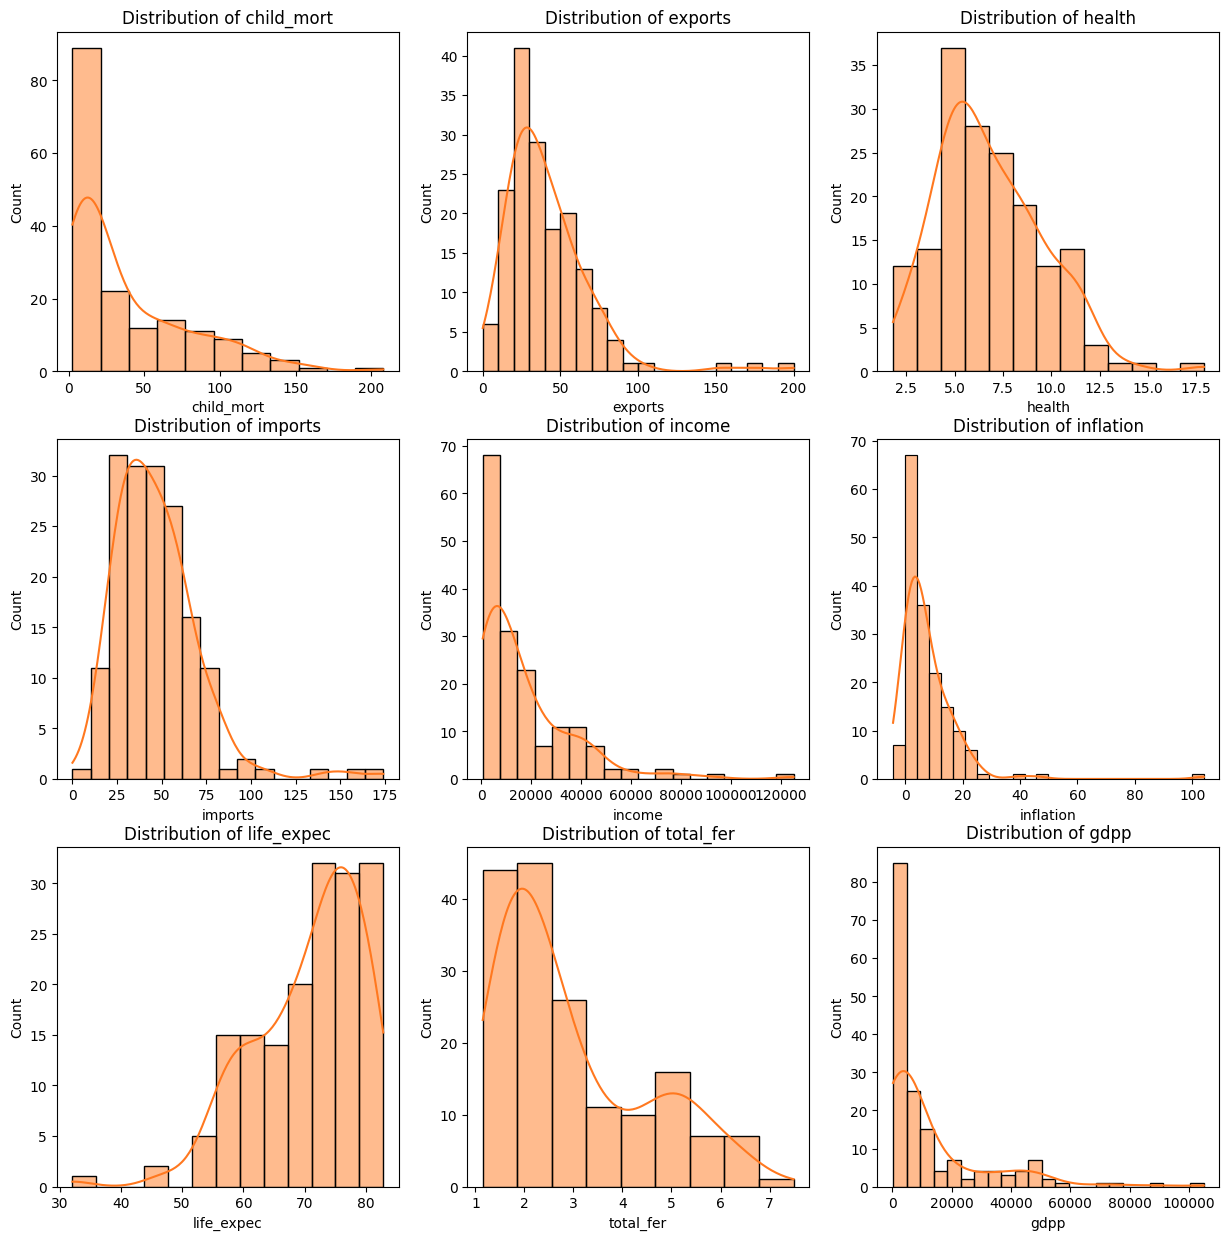

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))

for i in range (len(numerical_features)):
 plt.subplot(3,3,i+1)
 sns.histplot(data[numerical_features[i]],kde = True,color = colors[0])
 plt.title(f'Distribution of {numerical_features[i]}')
 
plt.show()

- life_expec displays a left or negatively skewed data distribution.
- **health** displays a normally distrubuted data.
- All the remaining features show a right or positively skewed data distribution.

### country vs Numerical Features : 

- **child_mort : Economically backward nations have a high infant mortality rate!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1464815979.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1464815979.py:4: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1464815979.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1464815979.py:12: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1464815979.py:20: FutureWarning:



Passing `palette

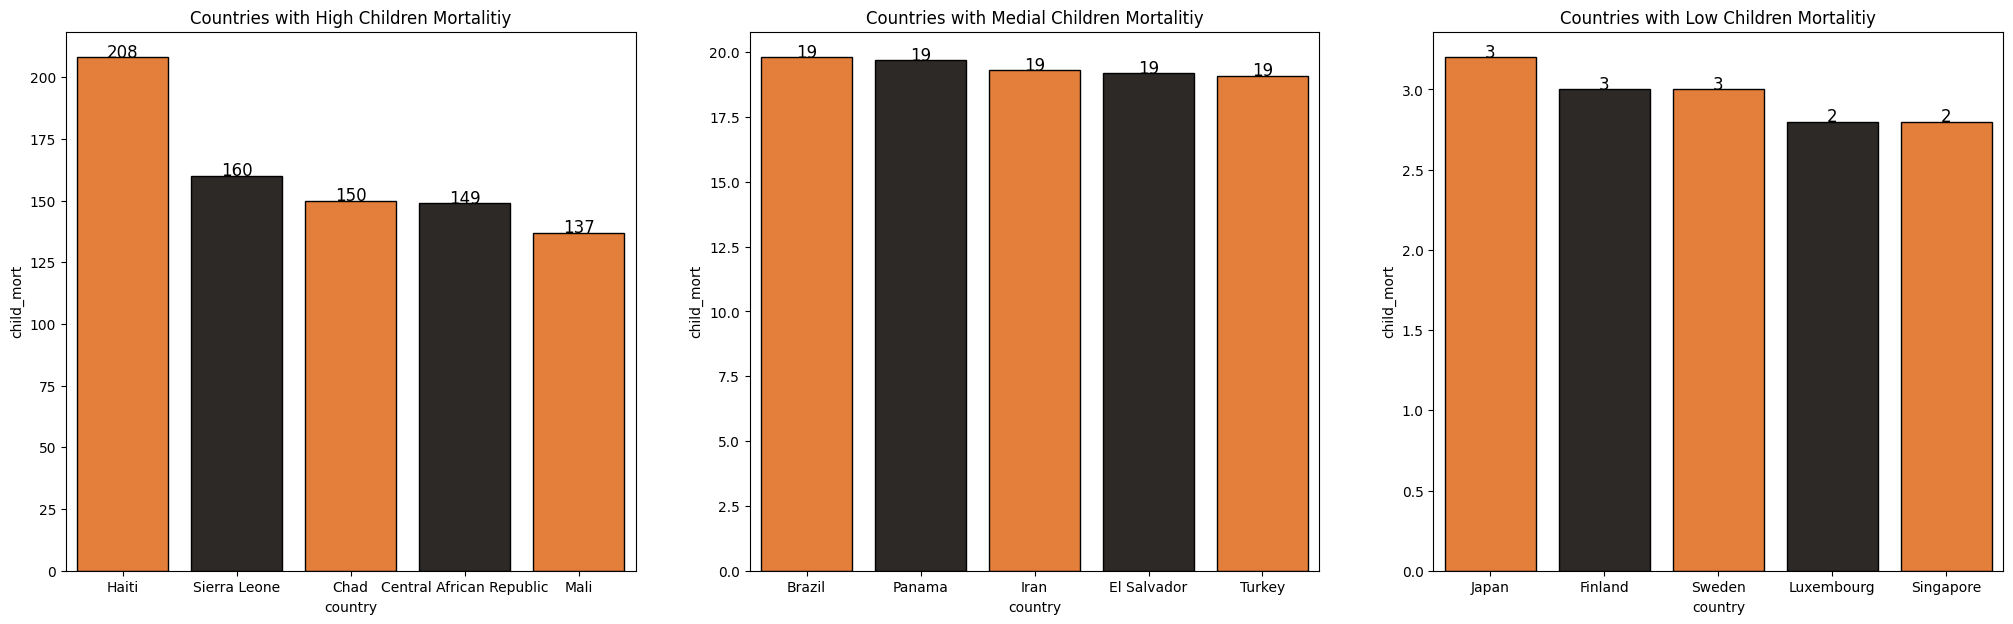

In [ ]:
fig = plt.subplots(1,3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort',  data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black')
plt.title('Countries with High Children Mortalitiy')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort' ,  data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black')

plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort'  ,  data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black')
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **exports : Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\504090063.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\504090063.py:3: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\504090063.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\504090063.py:10: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\504090063.py:17: FutureWarning:



Passing `palette` wit

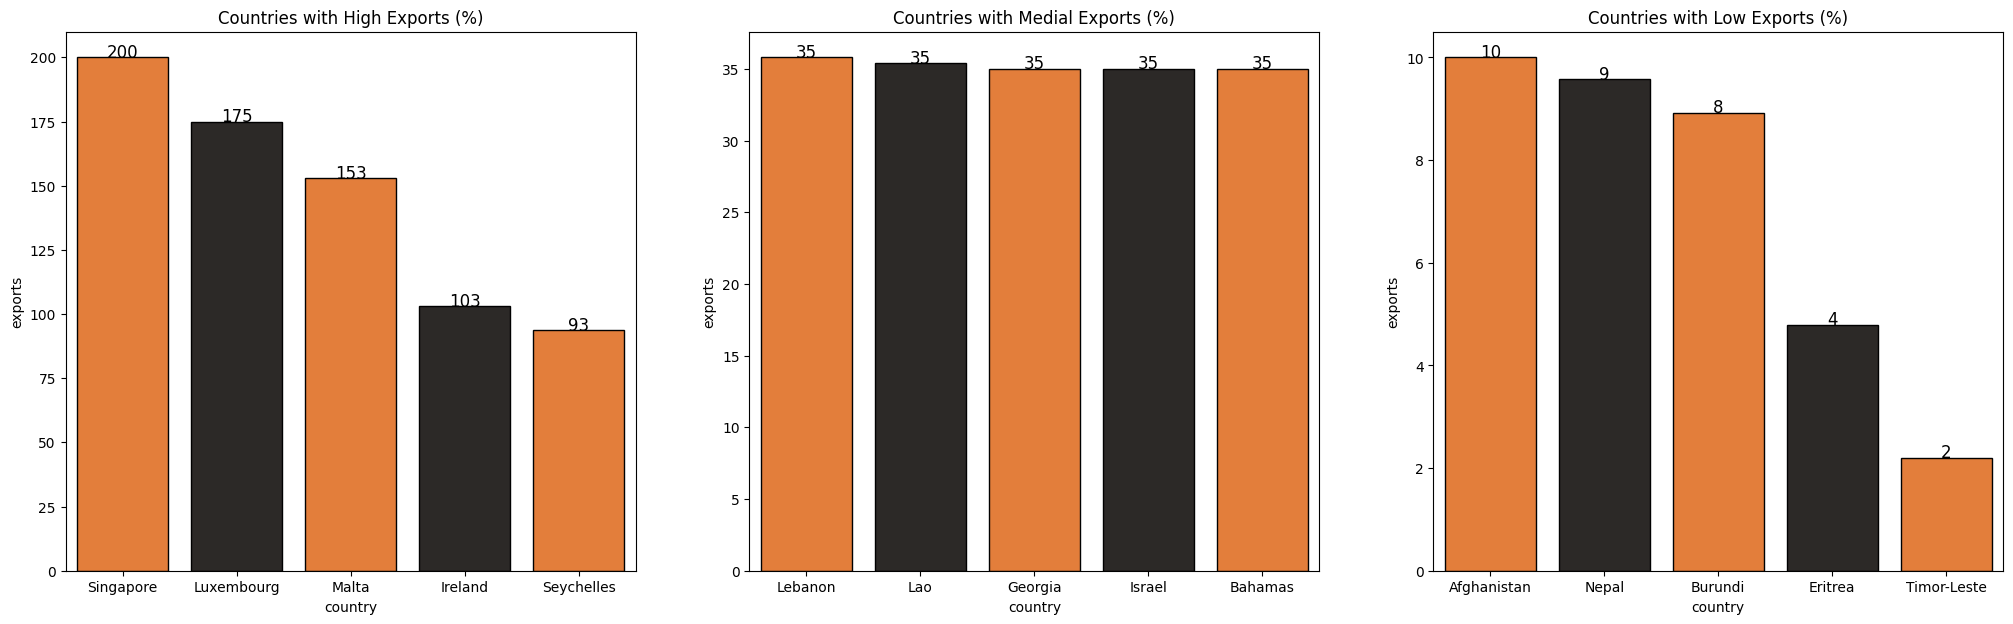

In [75]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1321595366.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1321595366.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1321595366.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

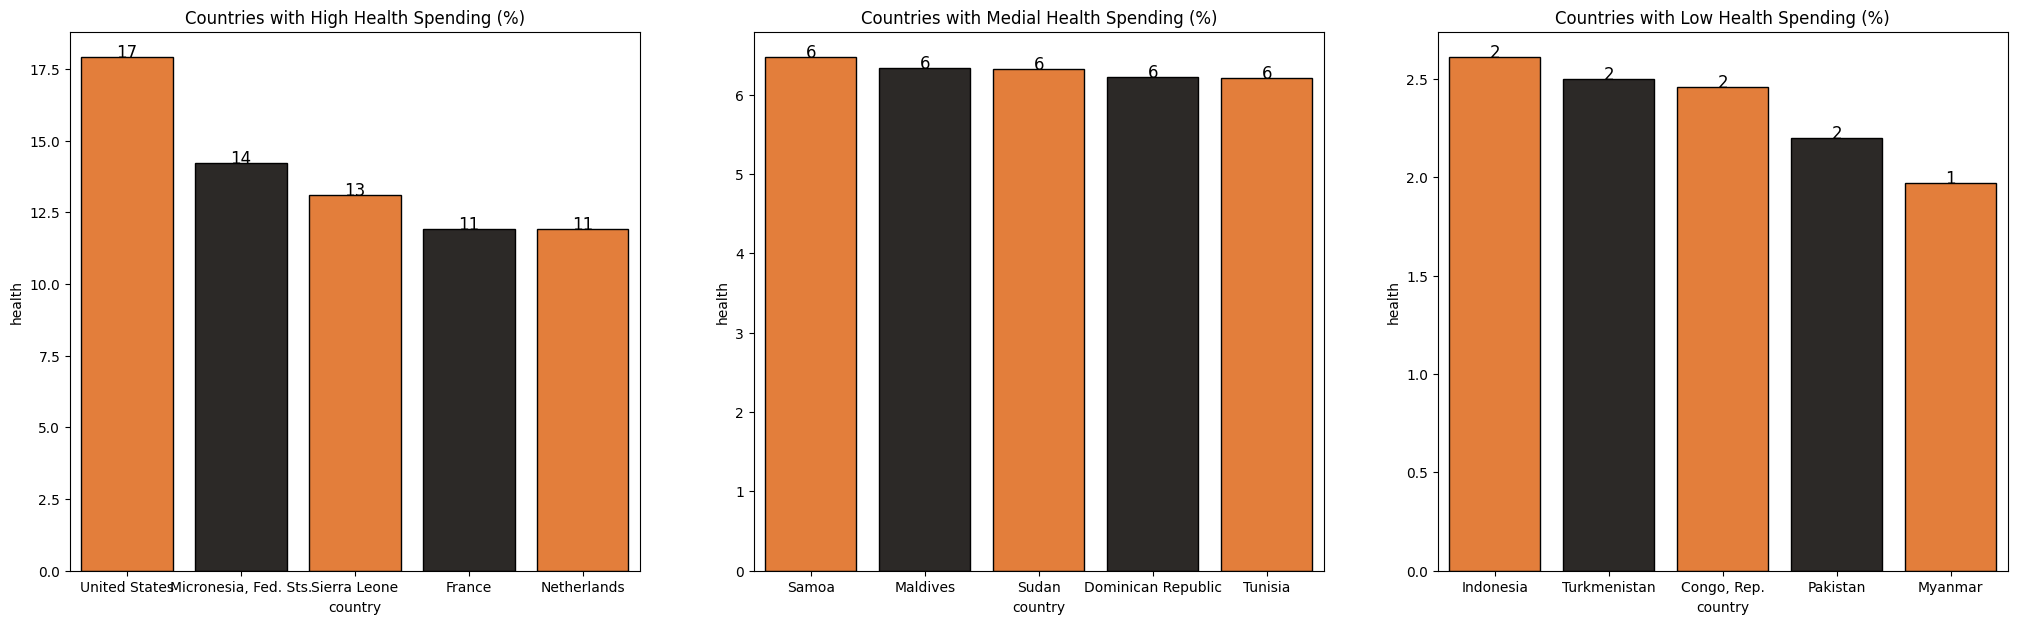

In [25]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\4077264605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\4077264605.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\4077264605.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

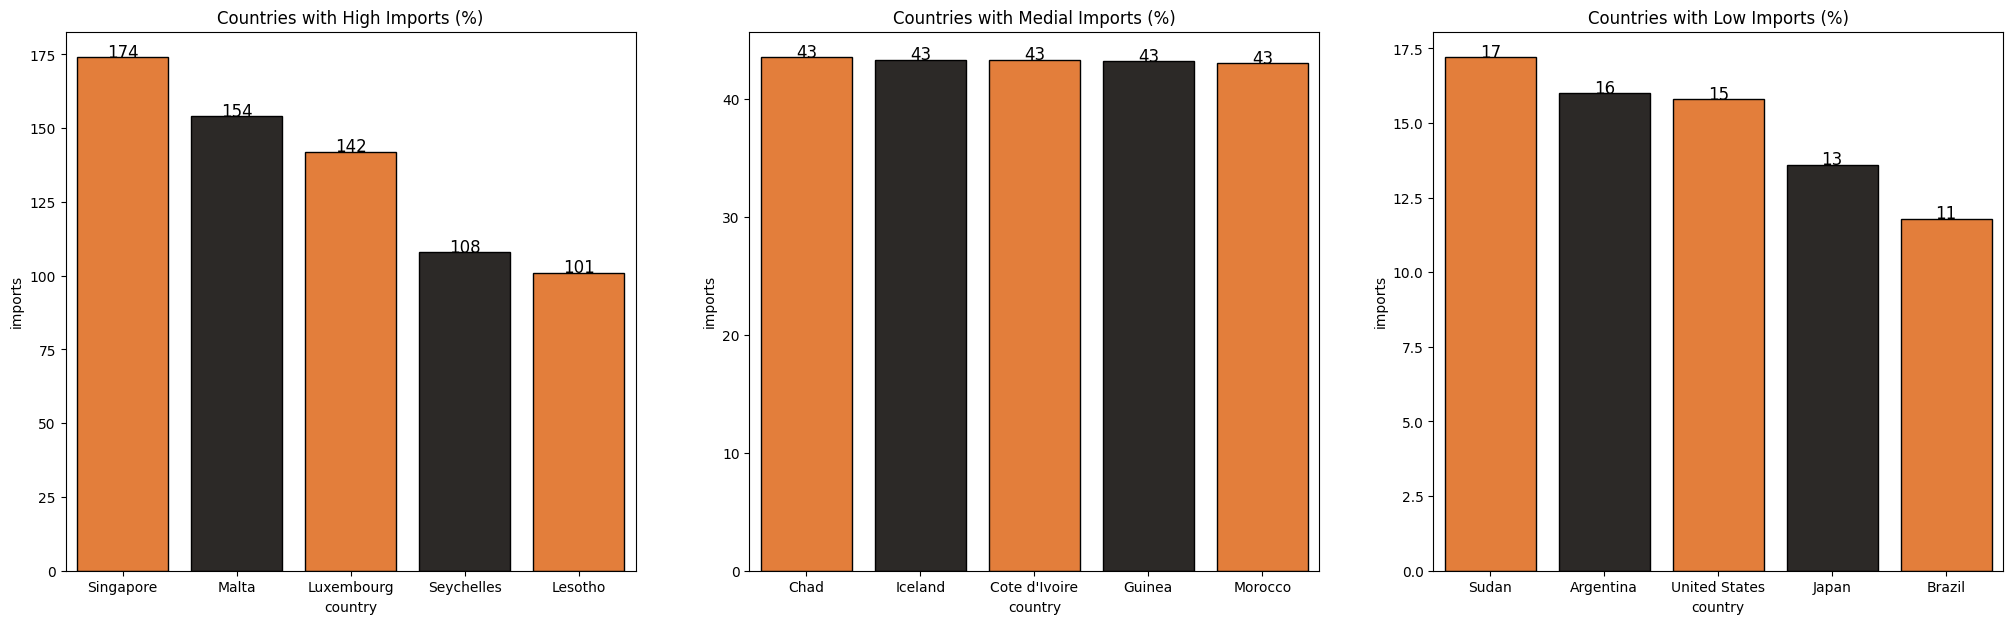

In [26]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **income : Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\2232037367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\2232037367.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\2232037367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

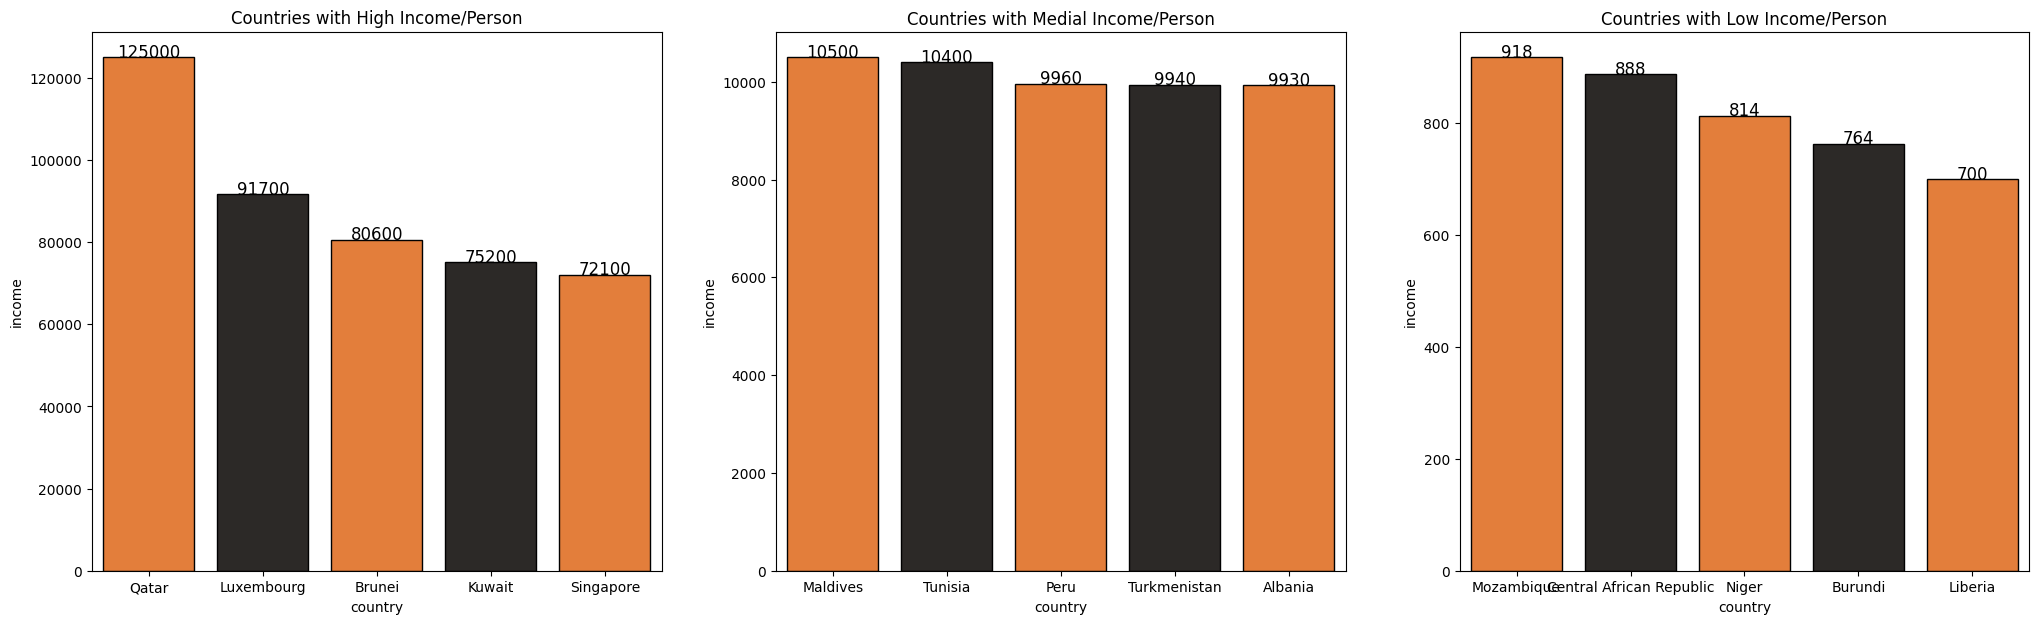

In [17]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\365234468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\365234468.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\365234468.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

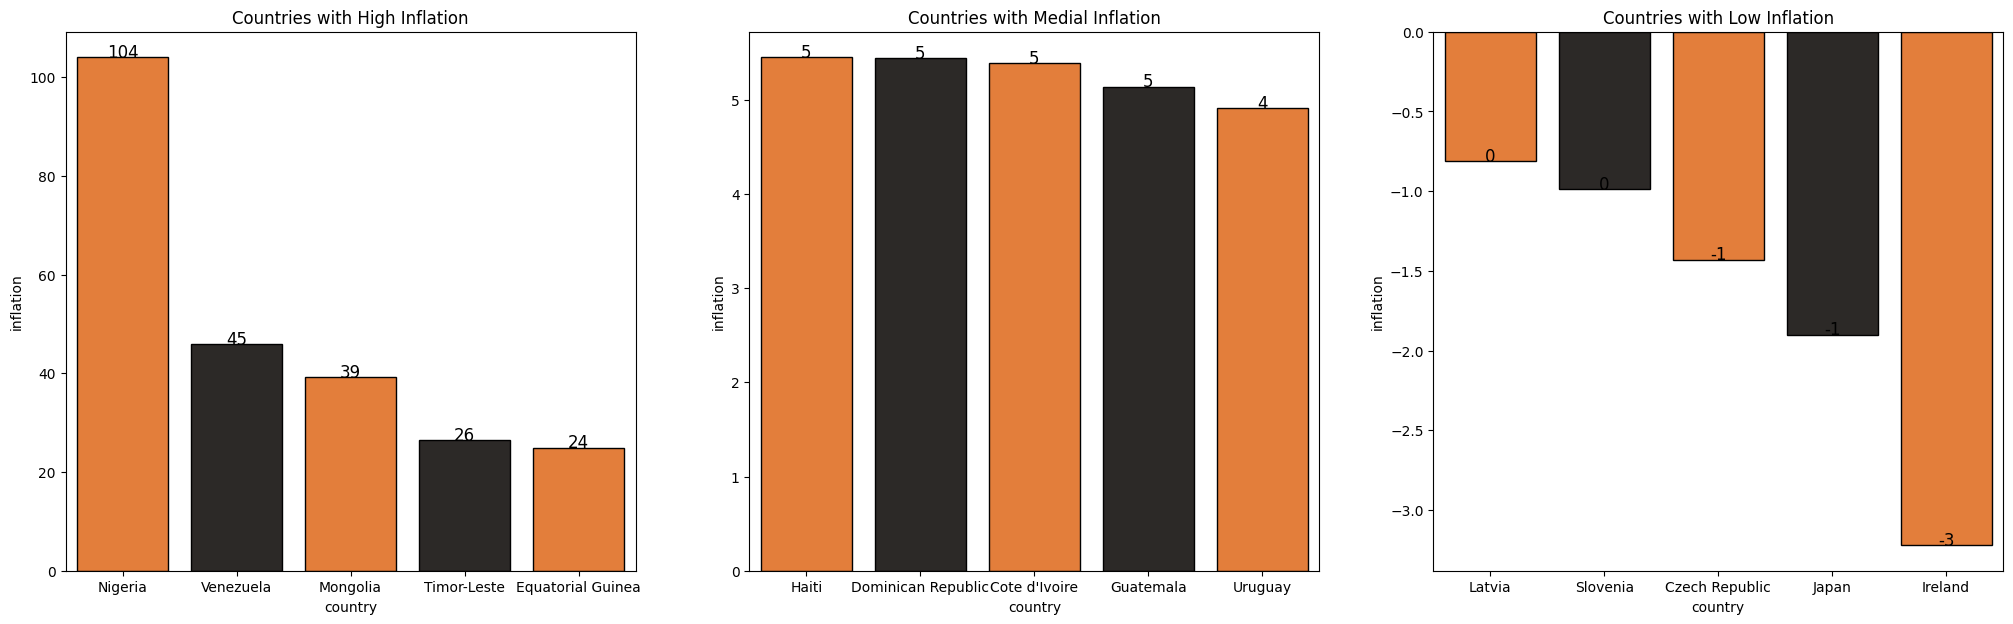

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\217670924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\217670924.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\217670924.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

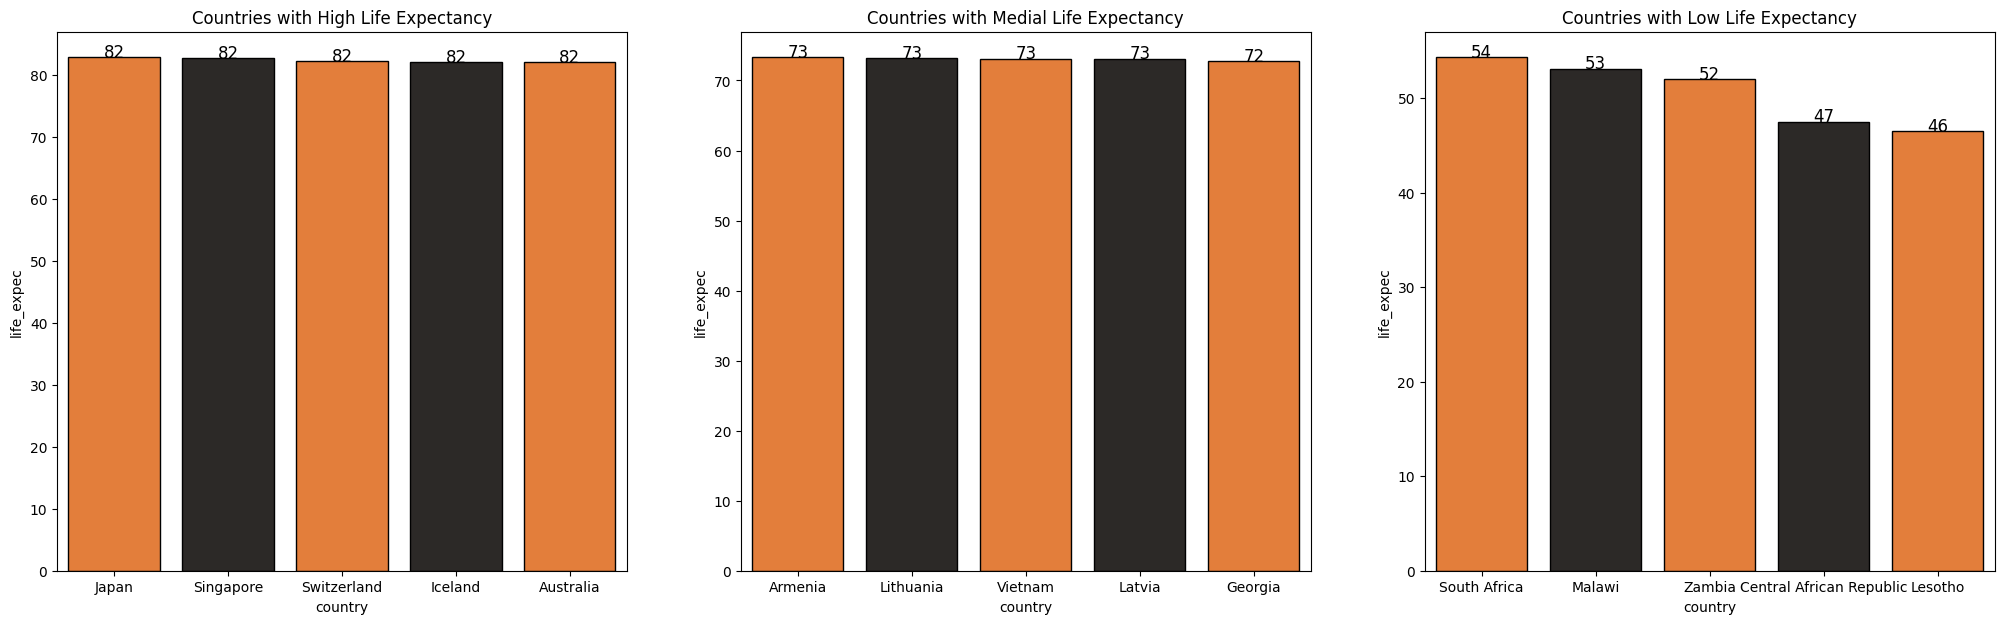

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **total_fer : Economically backward countries have a high fertility rate!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3485325490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3485325490.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3485325490.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

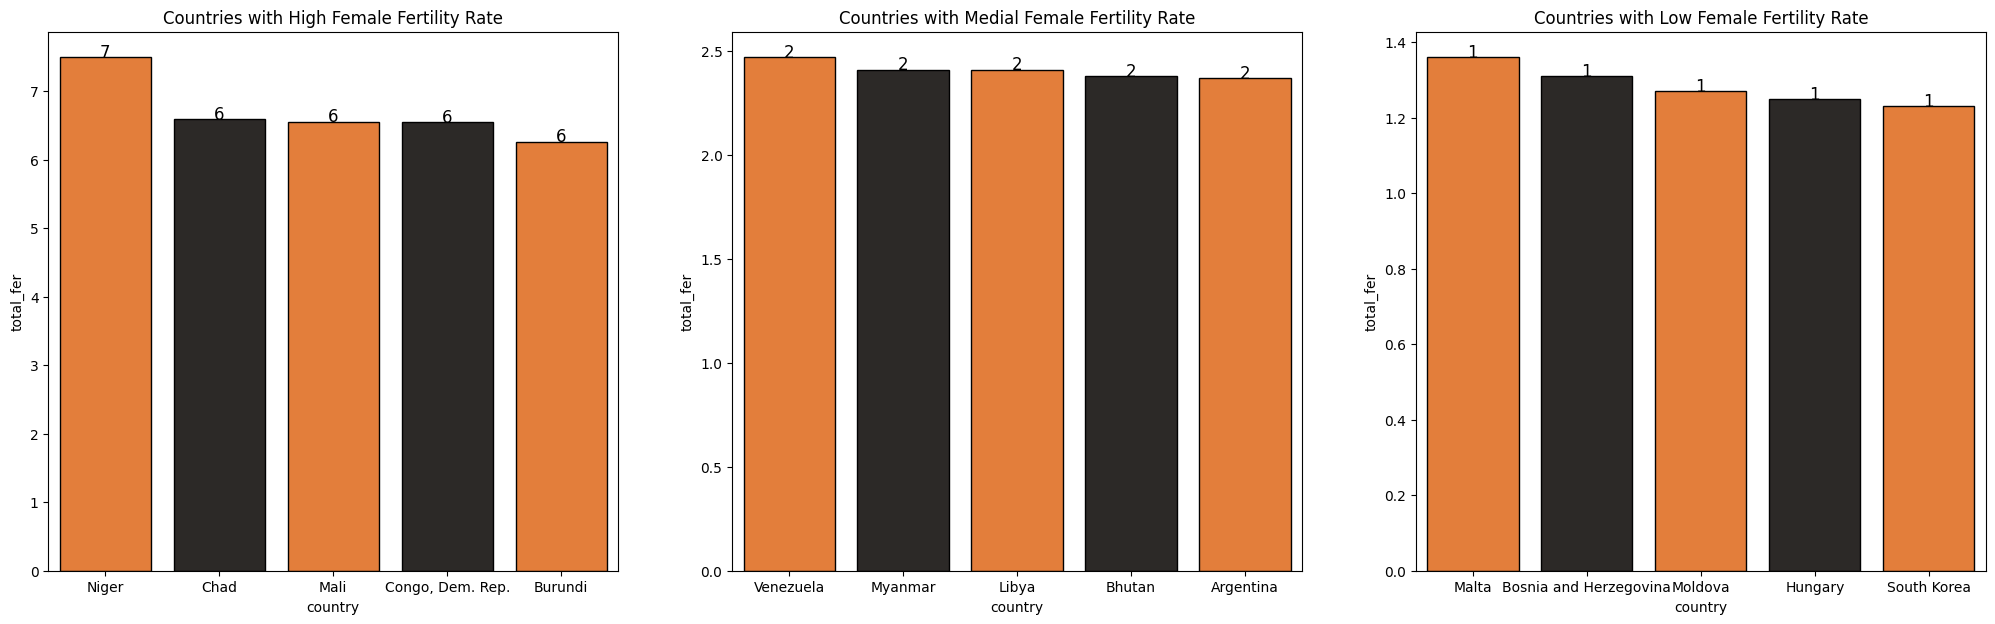

In [20]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!**

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3949336454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3949336454.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3949336454.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sn

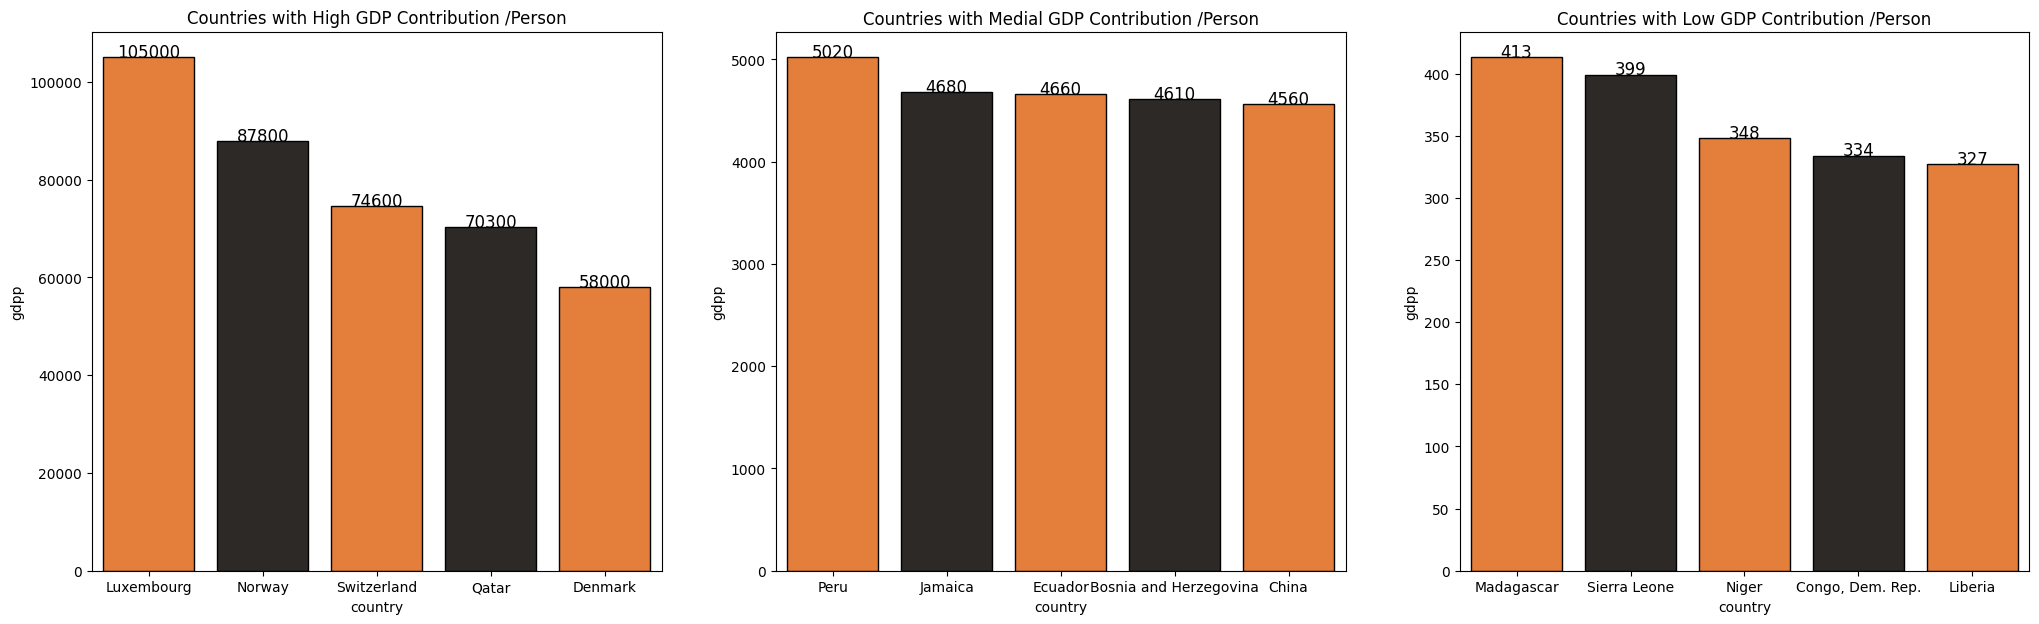

In [21]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

###  Numerical Features :

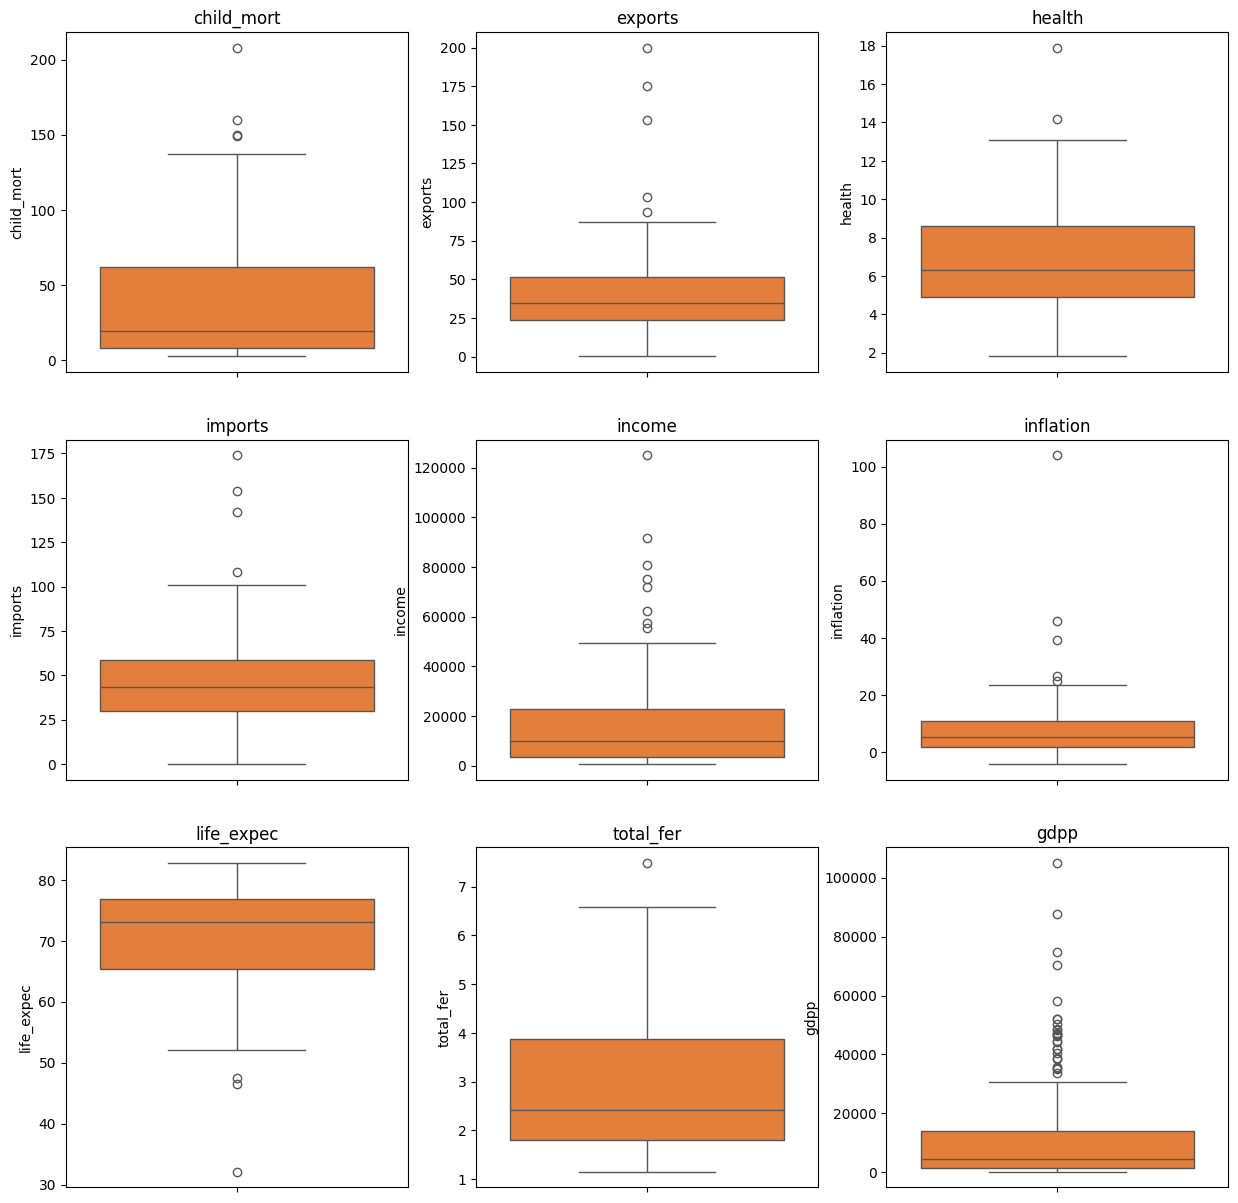

In [27]:
# We use boxplots to check the outliers in the numerical features
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

## Feature Engineering

### Correlation Matrix :

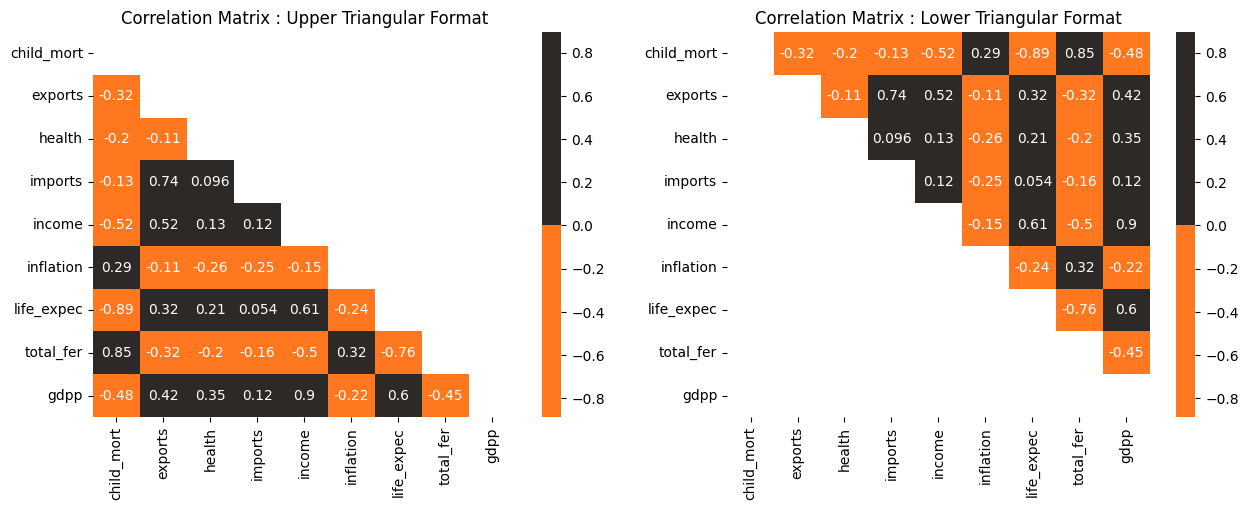

In [28]:
data_without_country = data.copy() #copy the dataframe
data_without_country = data_without_country.drop(labels=['country'], axis=1) #drop the country field because in correlation matrix we cannot have categorical features
#create the triangular upper matrix and lower matrix for the correlation matrices
ut = np.triu(data_without_country.corr())  
lt = np.tril(data_without_country.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
#cerate the sns heatmapp for both, and use the mask one as ut and one as lt
sns.heatmap(data_without_country.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap( data_without_country.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');
#why do we do it with masking not just put them both directly ?

- Many features have relationships with each other.
- **child_mort** clearly increases when **income**, **gdpp** & **exports** decreases. Rise in **inflation** also leads to high **child_mort** cases. Economic conditions unfortunately act as an important factor!
- Rise in **exports** clearly increases **gdpp**, **income** & **imports**.
- Spending on **health** has a small rise in **life_expec** and also decreases the **child_mort**.
- **income** & **gdpp** display a very high 0.9 correlation value. From the health perspective, high **income** has lead to higher **life_expec** but decreases the **total_fer** by some significant margin.
- As expected high **inflation** has a negative effect on the financial features. High **inflation** displays a high **total_fer** and **child_mort**. This describes the typical features of a backward nation.
- According to the data, higher **life_expec** displays a low **total_fer**. Higher **gdpp** has lead more spending on **health**. 

**We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.**
- The 3 categories of the features are :
    - **health** : **child_mort**, **health**, **life_expec**, **total_fer**
    - **trade** : **imports**, **exports**
    - **finance** : **income**, **inflation**, **gdpp**


In [29]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'] .mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] /data['exports'] .mean())
df1['Finance'] = (data['income'] /data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'] .mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


### Data Scaling :

In [30]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization: it is needed because the data categories have different units and scales, so we need to normalize them
ss = StandardScaler() # Standardization: After normalization, we need to make these data points at the same scale.
#Without standardization, features with larger ranges could dominate the learning process, leading to biased results.

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1['country'] = data['country'] ### Now add the country column
df1.head()

,Health,Trade,Finance,country
0,0.63,0.14,0.08,Afghanistan
1,0.13,0.20,0.09,Albania
2,0.18,0.19,0.21,Algeria
3,0.66,0.28,0.24,Angola
4,0.12,0.28,0.15,Antigua and Barbuda


### Principal Component Analysis (PCA) :

In [31]:
df2 = data.copy() #copy the data df 

col = list(data.columns)
col.remove('health') #remove health column
col.remove('country') #remove the country column

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


In [32]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

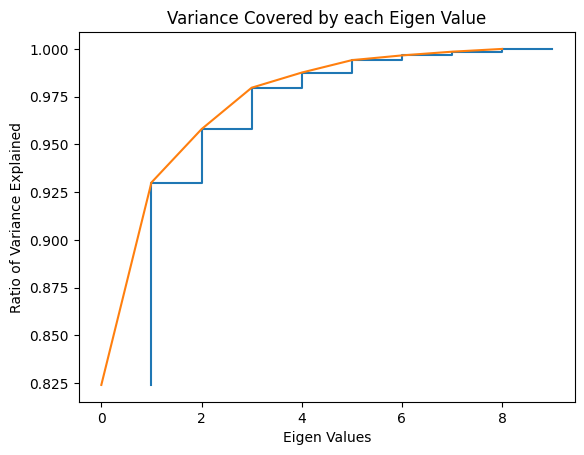

In [33]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

- **eigen values with more than 95% of ratio of variance** are selected.
- They correspond to the columns of the PCA generated dataframe.
- In this case, we select the **Eigen Value : 2** as the steps generated have significant variances and thus the other features get dominated by their variances. 

In [34]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06


- **In this way, we reduce the dimensions! We will now move on to the modeling section and compare the performances of the 2 datasets :**
    - **Feature Combination : Health - Trade - Finance**
    - **PCA Data**

### Modeling

In [35]:
m1 = df1.drop(columns = ['country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

## <center>K-Means Clustering</center>

### <center>Feature Combination : Health - Trade - Finance</center> 

#### Elbow Method & Silhouette Score Method :

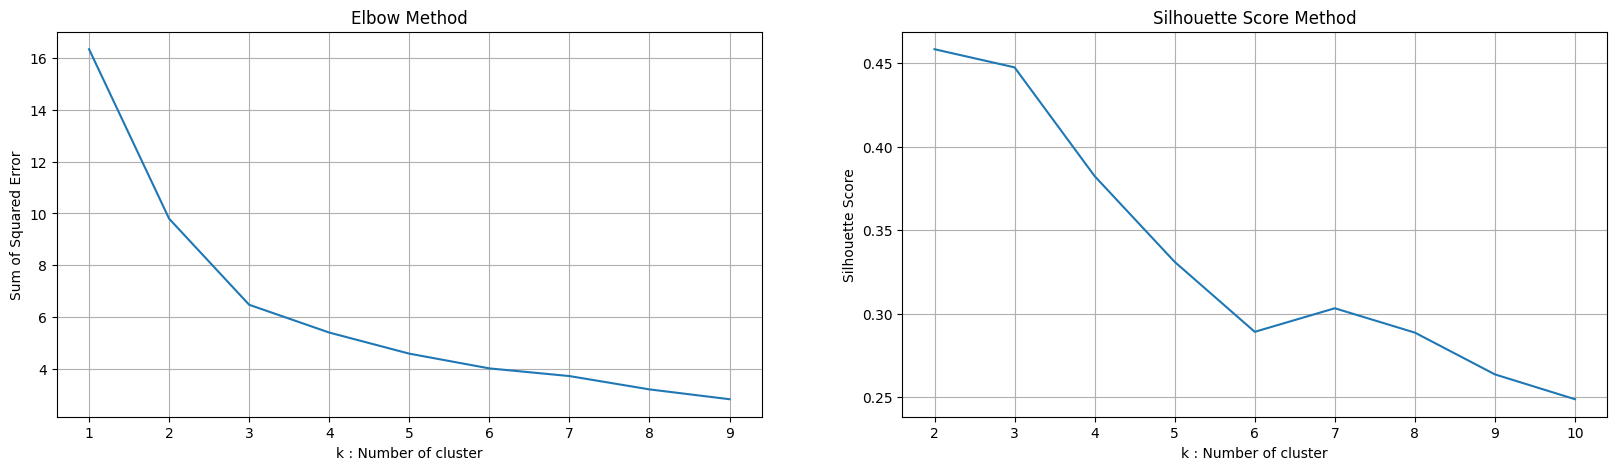

In [36]:
sse = {} #inertia values
sil = [] #silhoutte values
kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10): #test for k from 1 to 10
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1) #initiate kmeans clustering, with clusters k, iterations 1000, and fit the feature combination data
    sse[k] = kmeans.inertia_   # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values())) #line plot for inertia
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean')) #calculate the silhoutte score using euclidean distance
sns.lineplot(x = range(2,kmax + 1), y = sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**

In [44]:
model = KMeans(n_clusters = 3,max_iter = 1000) #based on above results, calculate kmeans for k = 3
model.fit(m1)  # fit the feature combination dataset
cluster = model.cluster_centers_ #get the centroids
centroids = np.array(cluster)
labels = model.labels_
df1['Class'] = labels


In [45]:
df1.head(10)

,Health,Trade,Finance,country,Class
0,0.63,0.14,0.08,Afghanistan,2
1,0.13,0.20,0.09,Albania,1
2,0.18,0.19,0.21,Algeria,1
3,0.66,0.28,0.24,Angola,2
4,0.12,0.28,0.15,Antigua and Barbuda,1
5,0.19,0.09,0.32,Argentina,1
6,0.08,0.17,0.10,Armenia,1
7,0.16,0.11,0.46,Australia,0
8,0.18,0.26,0.44,Austria,0
9,0.20,0.21,0.21,Azerbaijan,1


- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplot of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

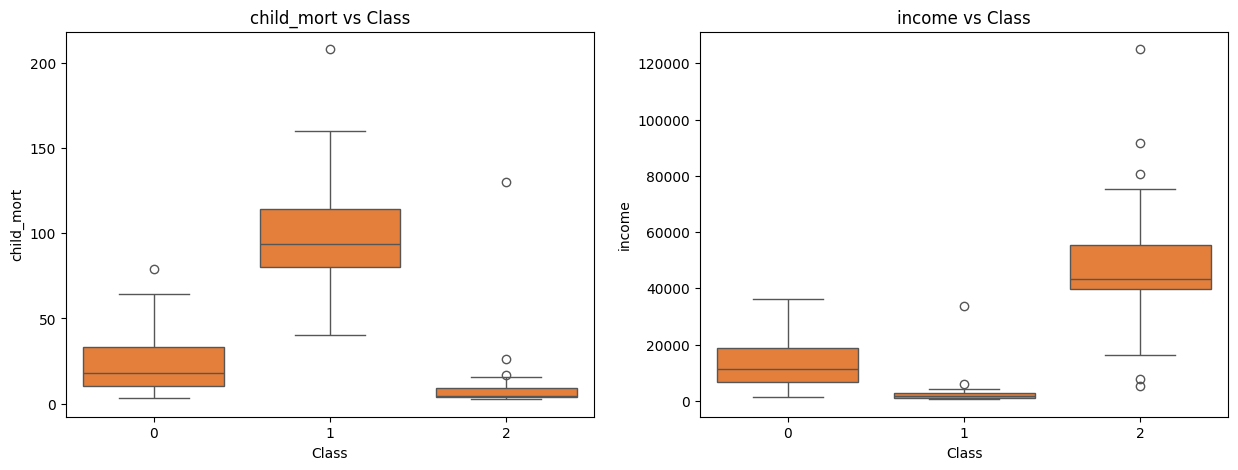

In [46]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F')
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F')
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : Might Need Help**
    - **1 : Help Needed**
    - **2 : No Help Needed**

In [47]:
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(df1[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
#fig.show(engine = 'kaleido')

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1111240848.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1111240848.py:1: SettingWithCopyWarning:


A value is trying to be set on a co

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Green'], [1.0, 'Green']],
              'geo': 'geo',
              'hovertemplate': 'Class=No Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  "Cote d'Ivoire", 'Equatorial Guinea', 'Gambia', 'Ghana', 'Guinea',
                                  'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia',
                                  'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique',
                                  'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Zambia'], dtype=object),
              'name': 'No Help Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'Class=Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
                                  'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
                                  'Estonia', 'Fiji', 'France', 'Gabon', 'Georgia', 'Greece', 'Grenada',
                                  'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
                                  'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
                                  'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
                                  'Macedonia, FYR', 'Madagascar', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Moldova', 'Montenegro', 'Morocco', 'Myanmar', 'Namibia', 'Nepal',
                                  'New Zealand', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
                                  'Portugal', 'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles',
                                  'Slovak Republic', 'Slovenia', 'Solomon Islands', 'South Africa',
                                  'South Korea', 'Spain', 'Sri Lanka', 'St. Vincent and the Grenadines',
                                  'Suriname', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisia', 'Turkey',
                                  'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uruguay', 'Uzbekistan',
                                  'Vanuatu', 'Vietnam', 'Yemen'], dtype=object),
              'name': 'Help Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Ye

### <center>PCA Data</center> 

#### Elbow Method & Silhouette Score Method :

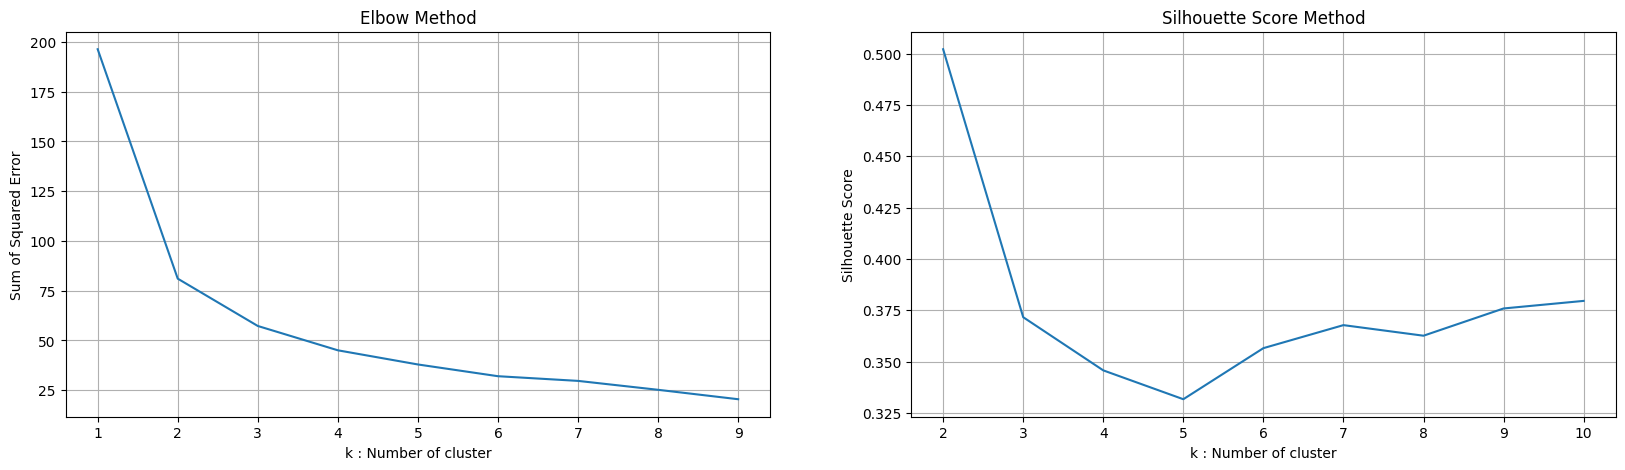

In [48]:
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2) #kmeans for pca dataset and iterations 1000
     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
     kmeans = KMeans(n_clusters = k).fit(m2)
     labels = kmeans.labels_
     sil.append(silhouette_score(m2, labels, metric = 'euclidean')) #calculate silhoutte 
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3** 

In [49]:
model = KMeans(n_clusters = 3,max_iter = 1000) #kmeans for k = 3 and iterations 1000
model.fit(m2)
cluster = model.cluster_centers_ #centroids
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels
pca_df2['Class'] = labels


In [50]:
pca_df2.head(10)

,0,1,2,Class
0,0.22,0.64,0.09,2
1,-0.08,-0.17,-0.21,2
2,-0.96,-0.13,-0.13,0
3,-1.51,0.47,0.28,0
4,-0.26,-0.24,-0.06,2
5,0.48,-0.06,-0.21,2
6,-0.87,-0.20,-0.23,0
7,0.75,-0.34,0.00,1
8,1.57,-0.33,0.10,1
9,-0.34,-0.09,-0.12,2


- We again check the scatterplot of **income** & **child_mort** w.r.t labelled clusters for confirming the cluster values!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

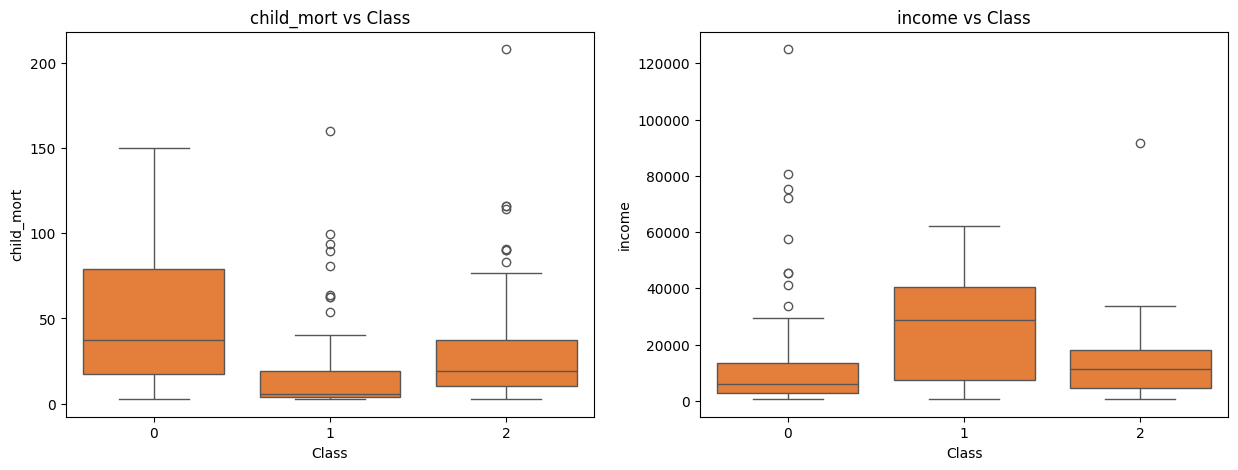

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : Help Needed**
    - **1 : No Help Needed**
    - **2 : Might Need Help**

In [52]:
pca_df2.insert(0,column = 'country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'No Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(pca_df2[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
#fig.show(engine = 'kaleido')

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3348951006.py:3: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\3348951006.py:3: SettingWithCopyWarning:


A value is trying to be set on a co

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Yellow'], [1.0, 'Yellow']],
              'geo': 'geo',
              'hovertemplate': 'Class=Might Need Help<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Albania', 'Antigua and Barbuda', 'Argentina',
                                  'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Botswana', 'Bulgaria',
                                  'Burkina Faso', 'Cambodia', 'Chile', 'Colombia', 'Congo, Dem. Rep.',
                                  'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador',
                                  'El Salvador', 'Estonia', 'Grenada', 'Guatemala', 'Guinea-Bissau',
                                  'Haiti', 'Hungary', 'Iran', 'Iraq', 'Israel', 'Jordan',
                                  'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg',
                                  'Macedonia, FYR', 'Malawi', 'Maldives', 'Mauritius', 'Namibia',
                                  'Panama', 'Paraguay', 'Poland', 'Romania', 'Samoa', 'Solomon Islands',
                                  'South Korea', 'Sudan', 'Suriname', 'Tajikistan', 'Tanzania', 'Togo',
                                  'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vietnam',
                                  'Zambia'], dtype=object),
              'name': 'Might Need Help',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'Class=Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Algeria', 'Angola', 'Armenia', 'Bahrain', 'Bangladesh', 'Belize',
                                  'Benin', 'Bhutan', 'Bolivia', 'Brunei', 'Cameroon', 'Cape Verde',
                                  'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Rep.',
                                  "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji',
                                  'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guyana', 'India', 'Indonesia',
                                  'Jamaica', 'Kazakhstan', 'Kenya', 'Kuwait', 'Lao', 'Libya',
                                  'Madagascar', 'Malaysia', 'Mali', 'Mauritania', 'Mongolia', 'Morocco',
                                  'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Oman',
                                  'Pakistan', 'Peru', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
                                  'Senegal', 'Seychelles', 'Singapore', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Thailand', 'Tonga', 'Turkmenistan',
                                  'United Arab Emirates', 'Vanuatu', 'Venezuela', 'Yemen'], dtype=object),
              'name': 'Help Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, 'Green'], [1.0, 'Green']],
              'geo': 'geo',
              'hovertemplate': 'Class=No Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
                 

## </center>DBSCAN Clustering</center>

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>Feature Combination : Health - Trade - Finance</center> 

Text(0.5, 1.0, 'K-Distance Graph')

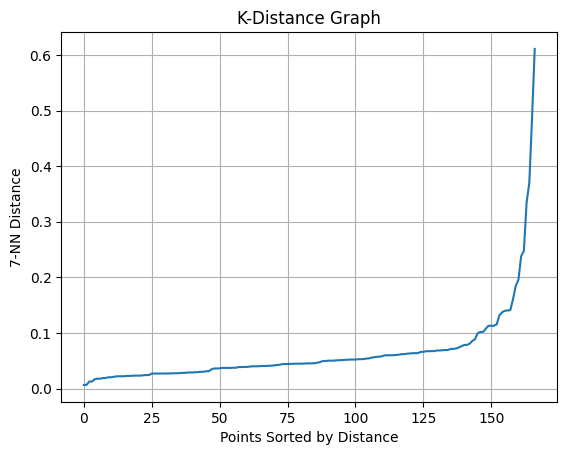

In [54]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [55]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


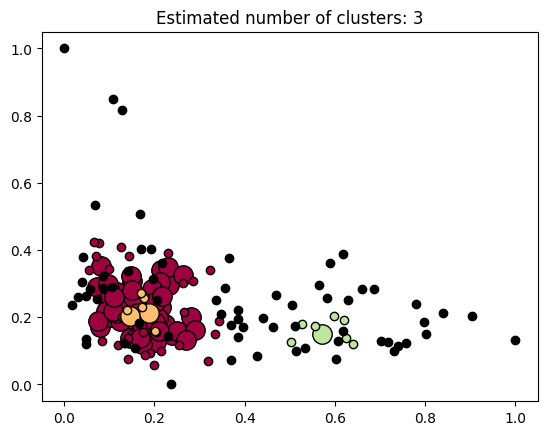

In [56]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplots of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

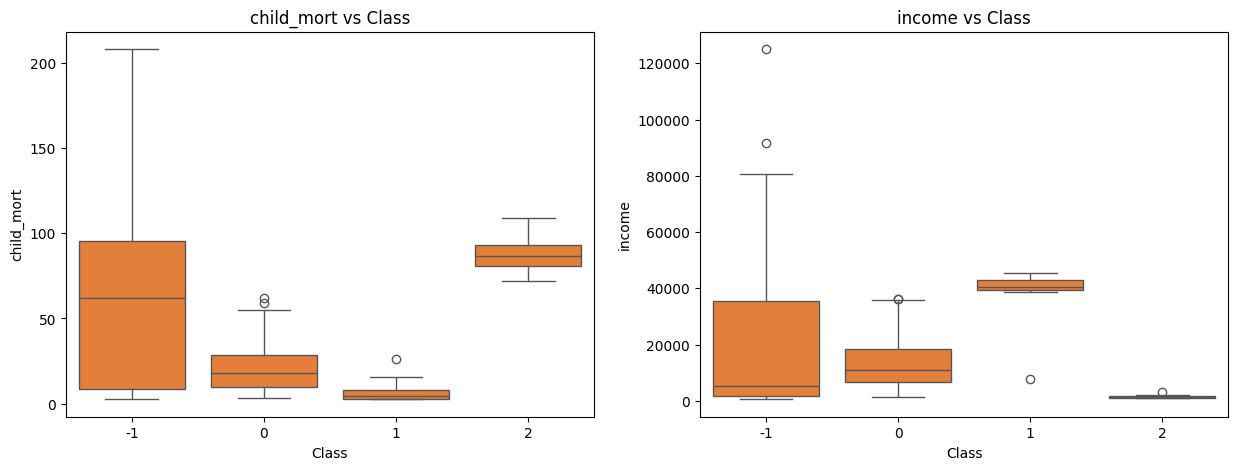

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- By rule **-1** is associated with **Noise / Outliers**!
- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Might Need Help**
    - **1 : No Help Needed**
    - **2 : Help Needed**

In [58]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
#fig.show(engine = 'kaleido')

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1703431136.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\1703431136.py:1: SettingWithCopyWarning:


A value is trying to be set on a co

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'Class=Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Gambia', 'Guinea', 'Malawi', 'Mozambique', 'Tanzania',
                                  'Uganda', 'Zambia'], dtype=object),
              'name': 'Help Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Yellow'], [1.0, 'Yellow']],
              'geo': 'geo',
              'hovertemplate': 'Class=Might Need Help<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bhutan',
                                  'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
                                  'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
                                  'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Georgia', 'Greece',
                                  'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
                                  'Iran', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
                                  'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Macedonia, FYR',
                                  'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco',
                                  'Nepal', 'New Zealand', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Portugal', 'Romania', 'Samoa', 'Serbia', 'Slovak Republic',
                                  'Solomon Islands', 'South Africa', 'Spain',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine',
                                  'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu'], dtype=object),
              'name': 'Might Need Help',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Black'], [1.0, 'Black']],
              'geo': 'geo',
              'hovertemplate': 'Class=Noise / Outliers<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Angola', 'Australia', 'Bahrain', 'Belarus', 'Belgium', 'Benin',
                                  'Botswana', 'Brunei', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Cyprus', 'Denmark',
                                  'Equatorial Guinea', 'France', 'Gabon', 'Ghana', 'Guinea-Bissau',
                                  'Haiti', 'Iraq', 'Ireland', 'Kenya', 'Kiribati', 'Kuwait', 'Lao',
                                  'Lesotho', 'Liberia', 'Libya', 'Luxembourg', 'Madagascar', 'Mali',
                                  'Malta', 'Mauritania', 'Micronesia, Fed. Sts.', 'Myanmar', 'Namibia',
                                  'Netherlands', 'Niger', 'N

### <center>PCA Data</center> 

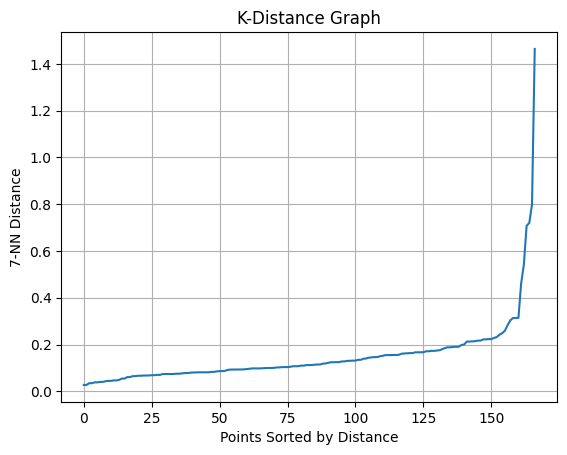

In [59]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')
plt.grid()
plt.plot(distances)

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.2

In [64]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


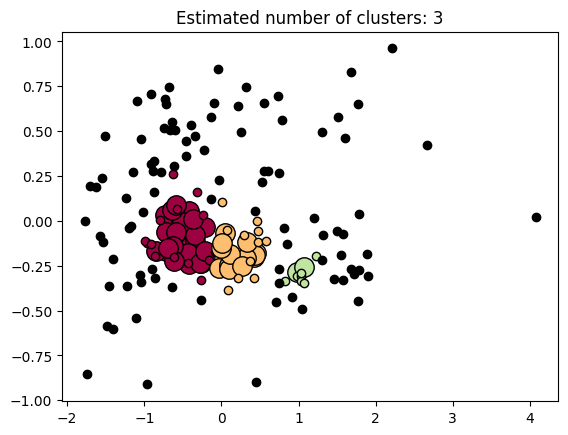

In [65]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

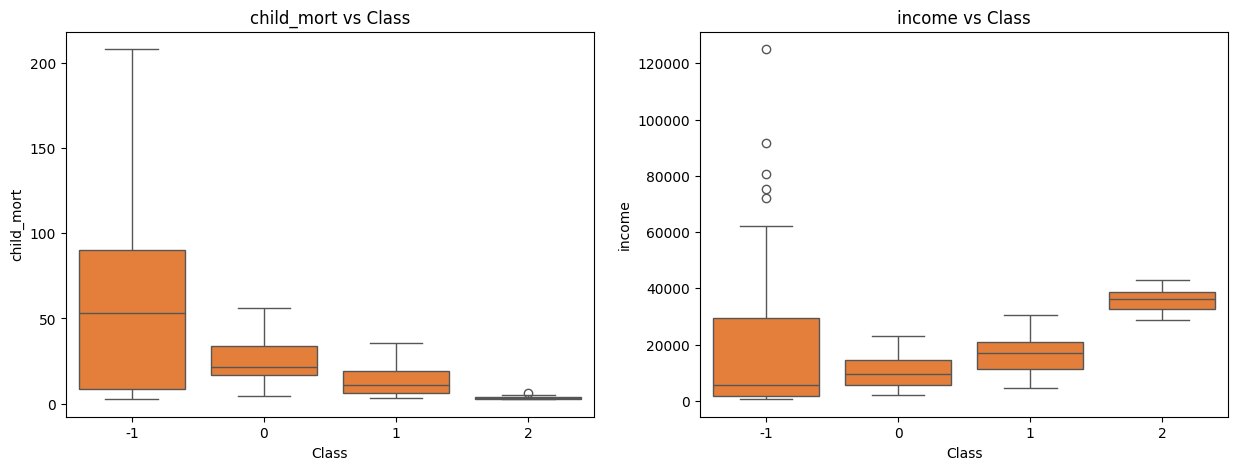

In [66]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**

In [70]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] ='No Help Needed'

fig = px.choropleth(pca_df2[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color_discrete_sequence=["orange", "red", "green",'black'],
                    color = pca_df2['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)

C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\2867483898.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\saraz\AppData\Local\Temp\ipykernel_14780\2867483898.py:2: FutureWarning:

ChainedAssignmentError: behaviour will change

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Yellow'], [1.0, 'Yellow']],
              'geo': 'geo',
              'hovertemplate': 'Class=Might Need Help<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Albania', 'Antigua and Barbuda', 'Argentina',
                                  'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Botswana', 'Bulgaria',
                                  'Burkina Faso', 'Cambodia', 'Chile', 'Colombia', 'Congo, Dem. Rep.',
                                  'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador',
                                  'El Salvador', 'Estonia', 'Grenada', 'Guatemala', 'Guinea-Bissau',
                                  'Haiti', 'Hungary', 'Iran', 'Iraq', 'Israel', 'Jordan',
                                  'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg',
                                  'Macedonia, FYR', 'Malawi', 'Maldives', 'Mauritius', 'Namibia',
                                  'Panama', 'Paraguay', 'Poland', 'Romania', 'Samoa', 'Solomon Islands',
                                  'South Korea', 'Sudan', 'Suriname', 'Tajikistan', 'Tanzania', 'Togo',
                                  'Tunisia', 'Turkey', 'Ukraine', 'Uruguay', 'Uzbekistan', 'Vietnam',
                                  'Zambia'], dtype=object),
              'name': 'Might Need Help',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
             {'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'Class=Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Algeria', 'Angola', 'Armenia', 'Bahrain', 'Bangladesh', 'Belize',
                                  'Benin', 'Bhutan', 'Bolivia', 'Brunei', 'Cameroon', 'Cape Verde',
                                  'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Rep.',
                                  "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji',
                                  'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guyana', 'India', 'Indonesia',
                                  'Jamaica', 'Kazakhstan', 'Kenya', 'Kuwait', 'Lao', 'Libya',
                                  'Madagascar', 'Malaysia', 'Mali', 'Mauritania', 'Mongolia', 'Morocco',
                                  'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Oman',
                                  'Pakistan', 'Peru', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
                                  'Senegal', 'Seychelles', 'Singapore', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Thailand', 'Tonga', 'Turkmenistan',
                                  'United Arab Emirates', 'Vanuatu', 'Venezuela', 'Yemen'], dtype=object),
              'name': 'Help Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, 'Green'], [1.0, 'Green']],
              'geo': 'geo',
              'hovertemplate': 'Class=No Help Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
                 

# <center>Conclusion</center>


- A model's performance is the reflection of the quality of the data feed to it. EDA section of this dataset provides a list of insights. Effect of normalization and standardization is massive on model performance.

- Feature engineering is pivotal! For **feature combination & PCA data**, complexity of methods to achieve it is clearly visible. These processes highlight the various options open and thus requires us to be sensible in choosing the methods depending on the data and the problem statement.


- **K-Means Clustering** and **DBSCAN Clustering** are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great. 